In [275]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import datetime


full_data = pd.read_csv('all_breakdown.csv')
full_data['SOLAR'] = full_data['SOLAR'].fillna(0)
full_data['SOLAR PV'] = full_data['SOLAR PV'].fillna(0)
full_data['SOLAR THERMAL'] = full_data['SOLAR THERMAL'].fillna(0)
full_data['SOLAR TOTAL'] = full_data['SOLAR']+full_data['SOLAR PV']+full_data['SOLAR THERMAL']
full_data['TIMESTAMP'] = pd.to_datetime(full_data['TIMESTAMP'])
full_data['TIMESTAMP'] = pd.to_datetime(full_data['TIMESTAMP'])
full_data['MONTH'] = full_data['TIMESTAMP'].dt.month
full_data['YEAR'] = full_data['TIMESTAMP'].dt.year
full_data['DAY'] = full_data['TIMESTAMP'].dt.day
#full_data['Hour'] = full_data['Hour'].astype(int)
full_data['WIND SOLAR'] = full_data['SOLAR TOTAL'] + full_data['WIND TOTAL']
full_data['RENEW TOTAL'] = full_data['BIOGAS'] + full_data['BIOMASS']+ full_data['GEOTHERMAL']+full_data['GEOTHERMAL']+full_data['WIND SOLAR']
#bins = [0,5,11,16,20,25]
#labels = ['Night', 'Morning','Mid Day', 'Evening','Night']
#full_data['TIME OF DAY'] = 0
#full_data['TIME OF DAY'] = full_data['TIME OF DAY'].astype(str)
#for index,row in full_data.iterrows():
#    if row[4] < 6:
#       full_data.loc[index,'TIME OF DAY'] = 0
#   elif row[4] < 11:
#       full_data.loc[index,'TIME OF DAY'] = 1
#   elif row[4] < 16:
#       full_data.loc[index,'TIME OF DAY'] = 2
#   elif row[4] < 21:
#       full_data.loc[index,'TIME OF DAY'] = 3
#    elif row[4] < 25:
 #       full_data.loc[index,'TIME OF DAY'] = 0
        
YearMonthGrouped = full_data.groupby(['YEAR','MONTH'])
monthly_sum = pd.DataFrame(YearMonthGrouped['RENEW TOTAL'].sum())
monthly_sum['Renew Total'] = monthly_sum['RENEW TOTAL']
monthly_sum.drop(columns=['RENEW TOTAL'], inplace=True)
monthly_sum['Solar Total'] = YearMonthGrouped['SOLAR TOTAL'].sum()
monthly_sum['Wind Total'] = YearMonthGrouped['WIND TOTAL'].sum()
monthly_sum['Wind Solar Total'] = YearMonthGrouped['WIND SOLAR'].sum()

hour_grouped = full_data.groupby('Hour')
hour_sum = pd.DataFrame(hour_grouped['SOLAR'].mean())
#hour_sum['Solar'] = hour_sum['SOLAR']
hour_sum.drop(columns=['SOLAR'], inplace=True)
hour_sum['Wind Total'] = hour_grouped['WIND TOTAL'].mean()
#hour_sum['Biogas'] = hour_grouped['BIOGAS'].mean()
#hour_sum['Geothermal'] = hour_grouped['GEOTHERMAL'].mean()
hour_sum['Solar PV'] = hour_grouped['SOLAR PV'].mean()
hour_sum['Solar Total'] = hour_grouped['SOLAR TOTAL'].mean()
hour_sum['Solar Thermal'] = hour_grouped['SOLAR THERMAL'].mean()
hour_sum['Small Hydro'] = hour_grouped['SMALL HYDRO'].mean()
hour_sum['Biomass'] = hour_grouped['BIOMASS'].mean()
hour_sum['Renew Total'] = hour_grouped['RENEW TOTAL'].mean()

display(full_data.head())
display(monthly_sum.head())
display(hour_sum.head())
print(full_data.info())



,TIMESTAMP,BIOGAS,BIOMASS,GEOTHERMAL,Hour,SMALL HYDRO,SOLAR,SOLAR PV,SOLAR THERMAL,WIND TOTAL,SOLAR TOTAL,MONTH,YEAR,DAY,WIND SOLAR,RENEW TOTAL
0,2011-07-21 00:00:00,177.0,372.0,984.0,1.0,516.0,0.0,0.0,0.0,1607.0,0.0,7,2011,21,1607.0,4124.0
1,2011-07-21 01:00:00,176.0,373.0,984.0,2.0,509.0,0.0,0.0,0.0,1619.0,0.0,7,2011,21,1619.0,4136.0
2,2011-07-21 02:00:00,177.0,371.0,985.0,3.0,506.0,0.0,0.0,0.0,1660.0,0.0,7,2011,21,1660.0,4178.0
3,2011-07-21 03:00:00,177.0,374.0,985.0,4.0,504.0,0.0,0.0,0.0,1633.0,0.0,7,2011,21,1633.0,4154.0
4,2011-07-21 04:00:00,177.0,377.0,984.0,5.0,508.0,0.0,0.0,0.0,1520.0,0.0,7,2011,21,1520.0,4042.0


Renew Total  Solar Total  Wind Total  Wind Solar Total
YEAR MONTH                                                        
2010 4         911869.0      27307.0    208245.0          235552.0
     5        2610401.0     101640.0    665327.0          766967.0
     6        2806834.0     131065.0    805400.0          936465.0
     7        2912108.0     130052.0    842461.0          972513.0
     8        2665302.0     118890.0    680201.0          799091.0

,Wind Total,Solar PV,Solar Total,Solar Thermal,Small Hydro,Biomass,Renew Total
Hour,,,,,,,
1.0,1521.266220,0.029119,0.350497,0.055043,283.995980,298.051838,3925.975842
2.0,1530.472853,0.029119,0.282315,0.051136,274.658983,296.817526,3933.215053
3.0,1478.404808,0.025213,0.204190,0.013849,267.809934,297.830169,3881.872713
4.0,1409.330734,0.021307,0.167259,0.006037,266.499948,299.219628,3814.791535
5.0,1338.311521,0.406250,0.535156,0.008168,271.807781,300.312655,3744.782162


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67584 entries, 0 to 67583
Data columns (total 16 columns):
TIMESTAMP        67584 non-null datetime64[ns]
BIOGAS           67584 non-null float64
BIOMASS          67584 non-null float64
GEOTHERMAL       67584 non-null float64
Hour             67584 non-null float64
SMALL HYDRO      67584 non-null float64
SOLAR            67584 non-null float64
SOLAR PV         67584 non-null float64
SOLAR THERMAL    67584 non-null float64
WIND TOTAL       67584 non-null float64
SOLAR TOTAL      67584 non-null float64
MONTH            67584 non-null int64
YEAR             67584 non-null int64
DAY              67584 non-null int64
WIND SOLAR       67584 non-null float64
RENEW TOTAL      67584 non-null float64
dtypes: datetime64[ns](1), float64(12), int64(3)
memory usage: 8.3 MB
None


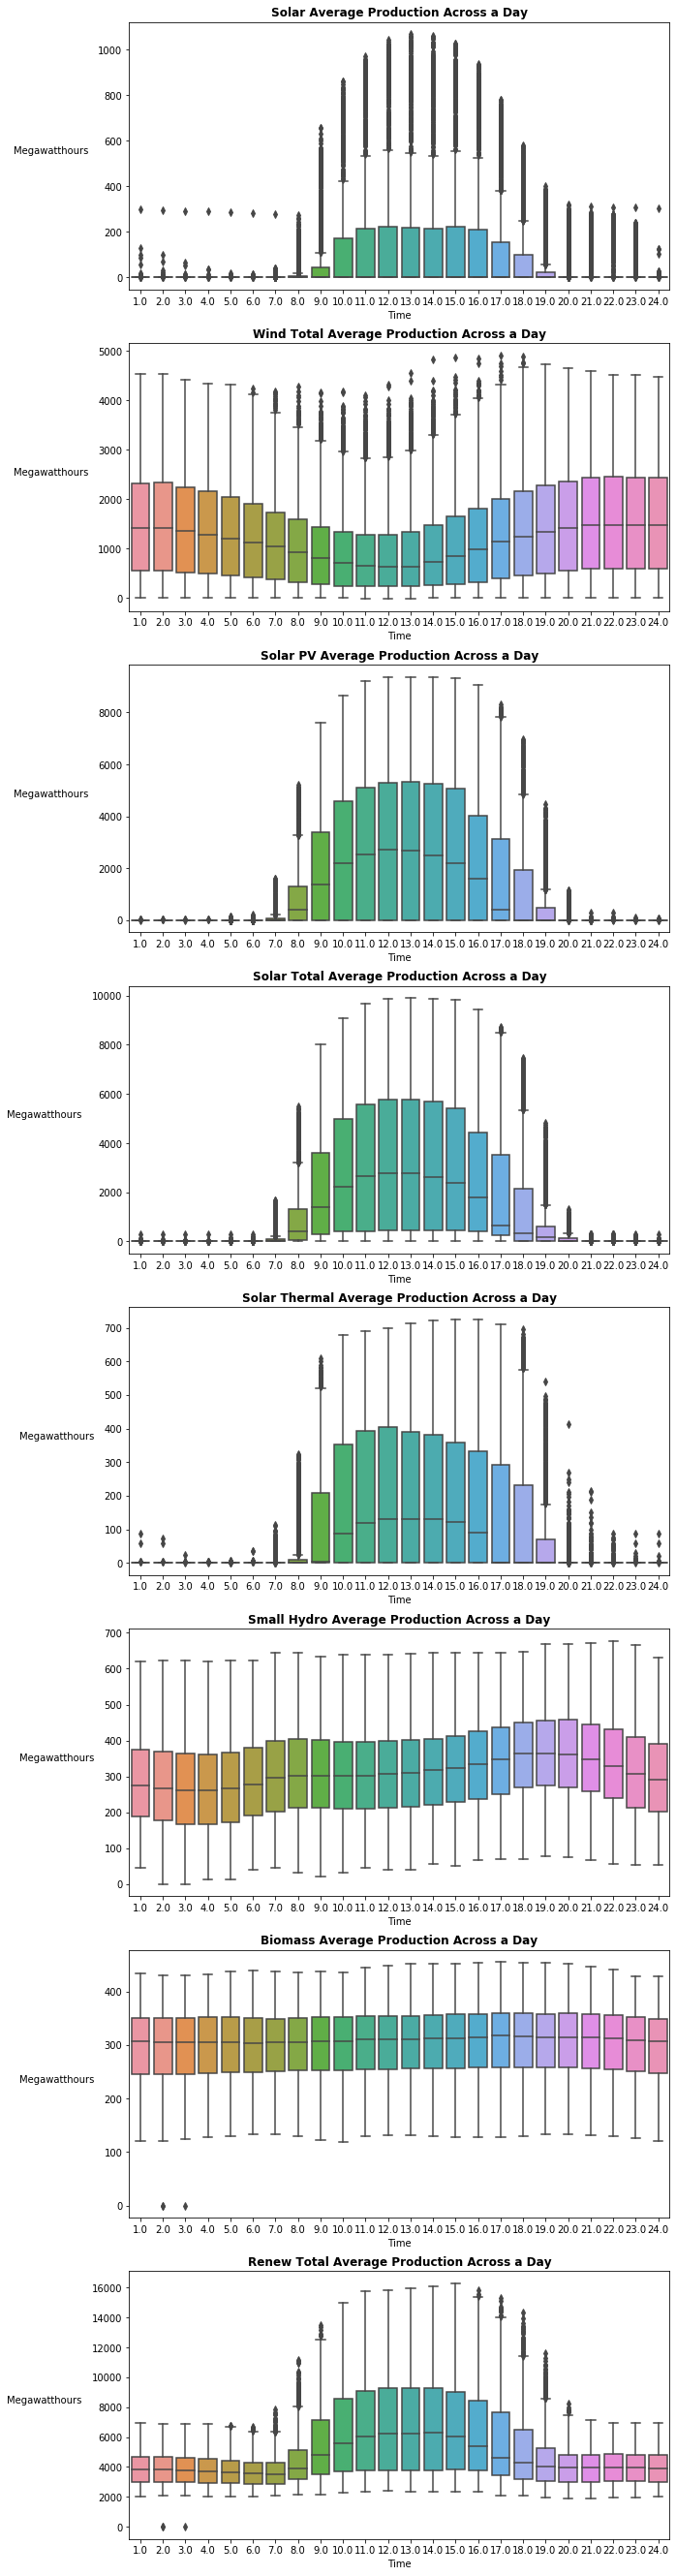

In [274]:
plt.figure(figsize=(10,num_rows*6))
for i in range(len(hour_sum.columns)):
    y = np.array(hour_sum.loc[:,hour_sum.columns[i]])
    x = np.array(hour_sum.reset_index().loc[:,'Hour'])
    plt.subplot(num_rows,1,i+1)
    sns.boxplot(full_data['Hour'],full_data[hour_sum.columns[i].upper()])

    plt.title('{} Average Production Across a Day'.format(hour_sum.columns[i]),fontweight='bold')

    plt.xlabel('Time')

    plt.ylabel("Megawatthours  ",rotation='0',ha='right')

plt.show()

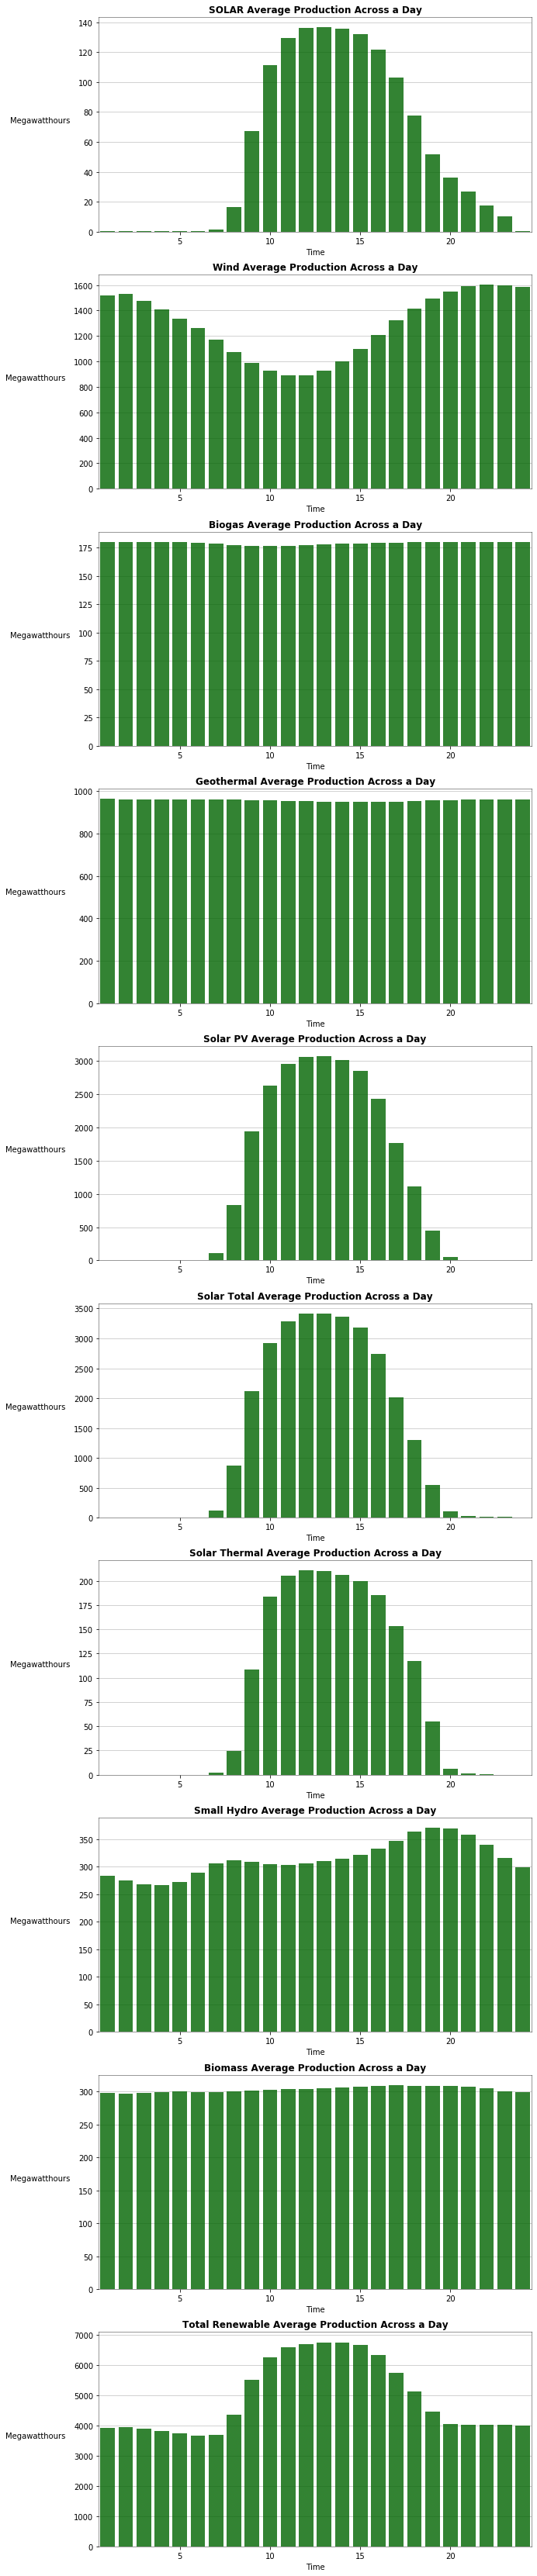

In [244]:

num_rows = len(hour_sum.columns)
plt.figure(figsize=(10,num_rows*6))
for i in range(len(hour_sum.columns)):
    y = np.array(hour_sum.loc[:,hour_sum.columns[i]])
    x = np.array(hour_sum.reset_index().loc[:,'Hour'])
    plt.subplot(num_rows,1,i+1)
    plt.bar(x,y,color='#006400',alpha=.8)
    plt.ylabel('')
    plt.title('{} Average Production Across a Day'.format(hour_sum.columns[i]),fontweight='bold')
    plt.gca().spines['top'].set_alpha(0.5)
    plt.gca().spines['left'].set_alpha(0.5)
    plt.gca().spines['right'].set_alpha(0.5)
    plt.gca().spines['bottom'].set_alpha(0.5)
    plt.gca().set_axisbelow(True)
    plt.gca().grid(axis='y',alpha=.7)
    plt.xlabel('Time')
    plt.xlim(.5,24.5)
    plt.ylabel("Megawatthours  ",rotation='0',ha='right')

plt.show()

#plot = sns.lineplot(solar_hour['Hour'],solar_hour['SOLAR'])
#plt.show()

#plot = sns.barplot(x='Hour',y='SOLAR',data=solar_hour)
#plt.xticks(rotation=50)
#plt.show()

#plot = sns.barplot(x='Hour',y='WIND TOTAL',data=solar_hour)
#plt.xticks(rotation=50)
#plt.show()

#plot = sns.barplot(x='Hour',y='BIOGAS',data=solar_hour)
#plt.xticks(rotation=50)
#plt.show()

#plot = sns.barplot(x='Hour',y='GEOTHERMAL',data=solar_hour)
#plt.xticks(rotation=50)
#plt.show()

#plot = sns.barplot(x='Hour',y='SOLAR PV',data=solar_hour)
#plt.xticks(rotation=50)
#plt.show()

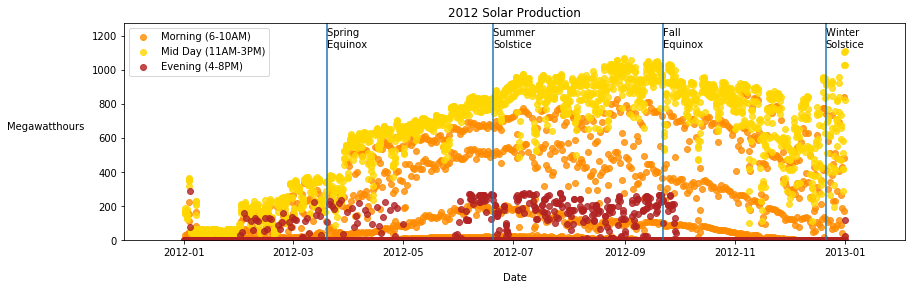

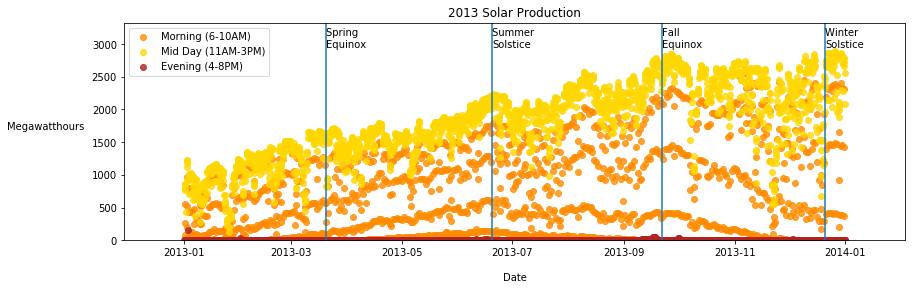

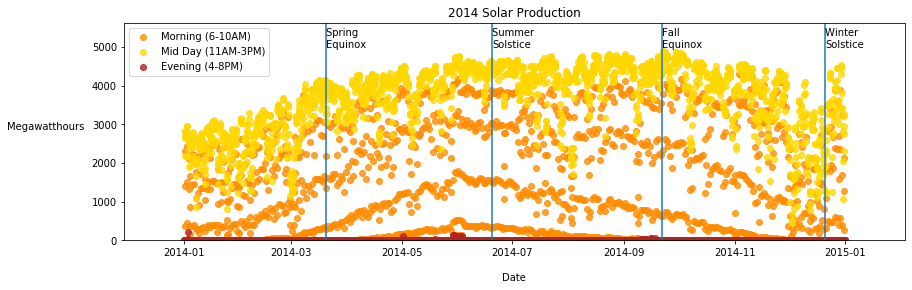

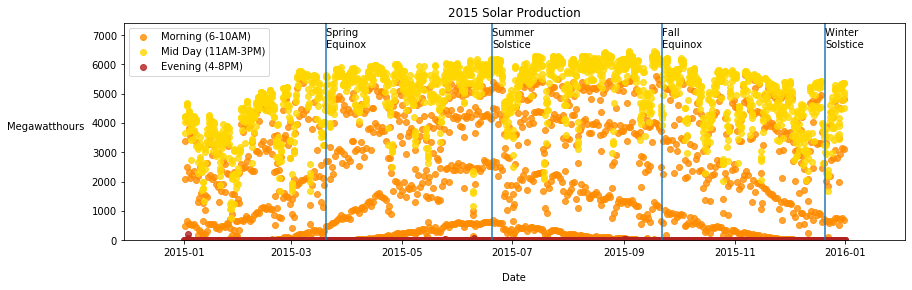

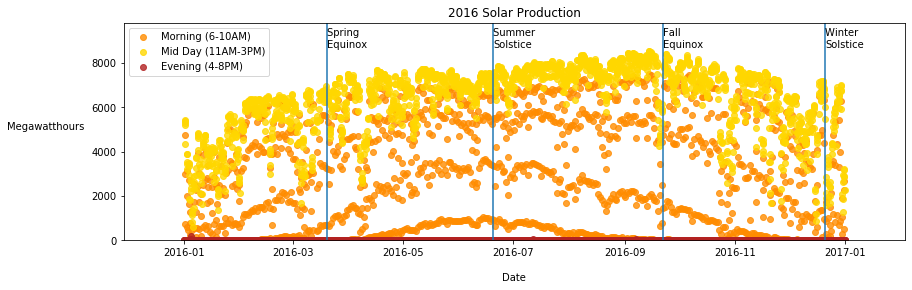

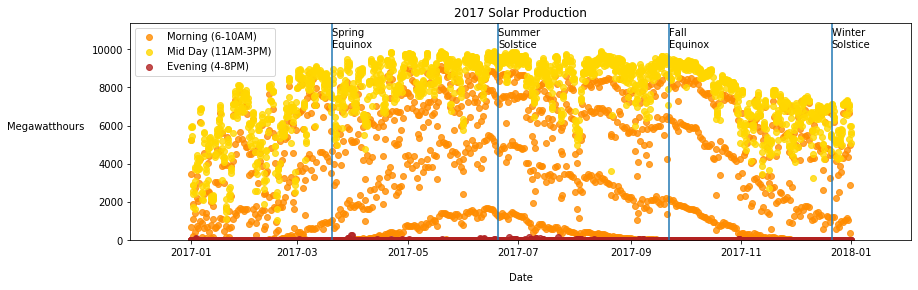

In [220]:


for year in range(2012,2018):
    
    data = full_data.loc[full_data['YEAR']==year,:]
    hour = data.loc[:,'Hour'].values
    mask_night = ((hour < 6)|(hour >20))
    mask_evening = ((hour < 6)|(hour >20))
    mask_morning = ((hour >5)&(hour<11))
    mask_mid = ((hour >10)&(hour<16))
    x = data['TIMESTAMP']
    y = data['SOLAR TOTAL']
    plt.figure(figsize=(14,4))
    plt.scatter(x[mask_morning], y[mask_morning],c='#FF8C00',alpha=.8,label='Morning (6-10AM)')
    plt.scatter(x[mask_mid], y[mask_mid],c='#FFD700',alpha=.8,label='Mid Day (11AM-3PM)')
    plt.scatter(x[mask_evening], y[mask_evening],c='#B22222',alpha=.8,label='Evening (4-8PM)')
    #plt.xlim(pd.to_datetime('01/01/12'),pd.to_datetime('12/31/12'))
    plt.ylim(0,y.max()*1.15)
    plt.ylabel('Megawatthours ',rotation='0',ha='right')
    plt.xlabel('\nDate')
    plt.title('{} Solar Production'.format(year))
    plt.legend()
    seasons = [(pd.to_datetime('June 20, {}'.format(year)), 'Summer \nSolstice'),
           (pd.to_datetime('December 21, {}'.format(year)), 'Winter \nSolstice'),
           (pd.to_datetime('September 22, {}'.format(year)), 'Fall \nEquinox'),
           (pd.to_datetime('March 20, {}'.format(year)), 'Spring \nEquinox')]
    for date,season in seasons:
        plt.axvline(date)
        plt.text(date,y.max()*1.02,season)
    plt.show()

<Figure size 1008x288 with 0 Axes>

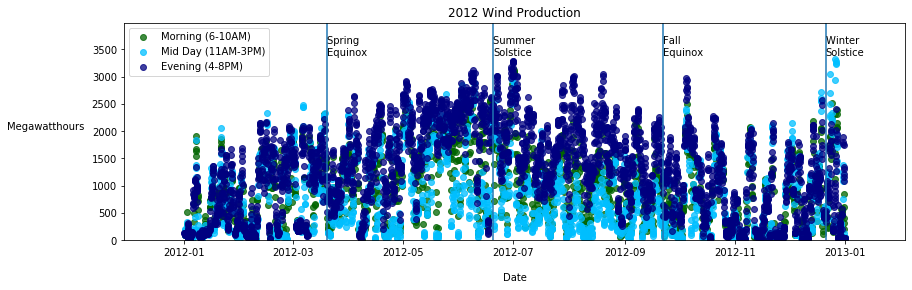

<Figure size 1008x288 with 0 Axes>

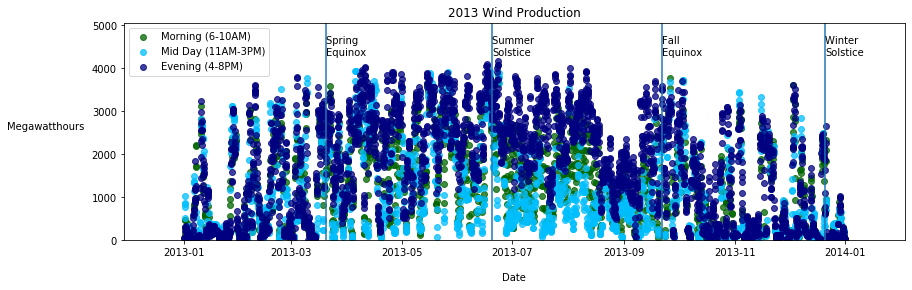

<Figure size 1008x288 with 0 Axes>

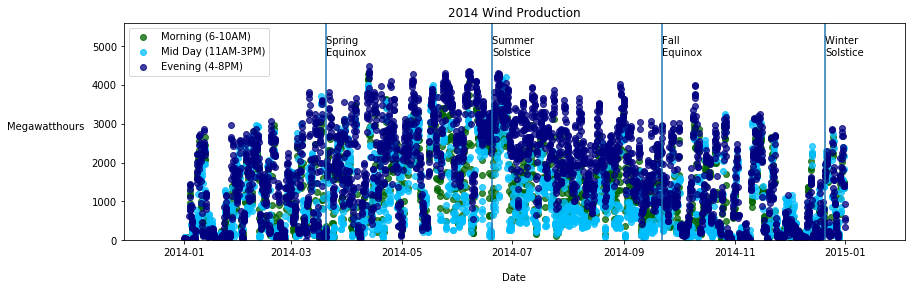

<Figure size 1008x288 with 0 Axes>

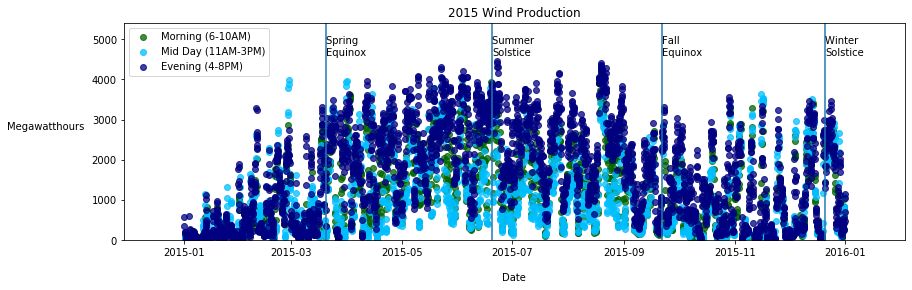

<Figure size 1008x288 with 0 Axes>

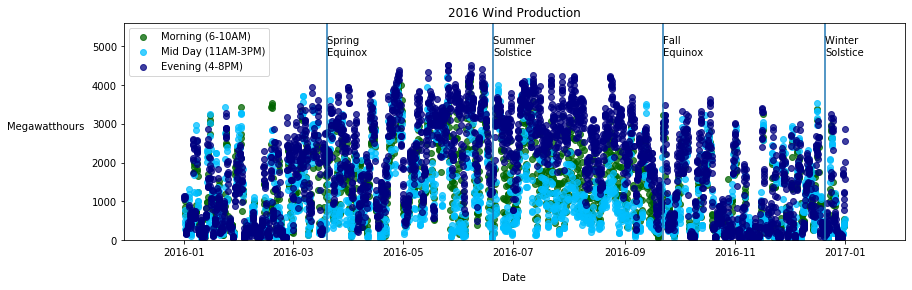

<Figure size 1008x288 with 0 Axes>

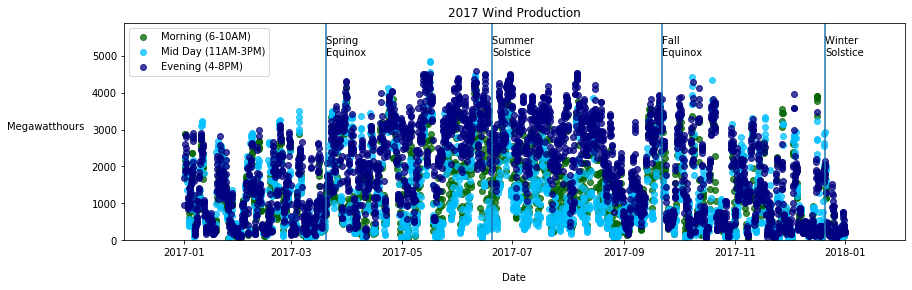

In [278]:
for year in range(2012,2018):
    data = full_data.loc[full_data['YEAR']==year,:]
    hour = data.loc[:,'Hour'].values
    mask_night = ((hour < 6)|(hour >20))
    mask_evening = ((hour < 6)|(hour >20))
    mask_morning = ((hour >5)&(hour<11))
    mask_mid = ((hour >10)&(hour<16))
    masks = [mask_morning, mask_mid, mask_evening]
    plt.figure(figsize=(14,4))
    x = data['TIMESTAMP']
    y = data['WIND TOTAL']
    plt.figure(figsize=(14,4))
    plt.scatter(x[mask_morning], y[mask_morning],c='#006400',alpha=.75,label='Morning (6-10AM)')
    plt.scatter(x[mask_mid], y[mask_mid],c='#00BFFF',alpha=.75,label='Mid Day (11AM-3PM)')
    plt.scatter(x[mask_evening], y[mask_evening],c='#000080',alpha=.75,label='Evening (4-8PM)')
    #plt.xlim(pd.to_datetime('01/01/12'),pd.to_datetime('12/31/12'))
    plt.ylim(0,y.max()*1.2)
    plt.ylabel('Megawatthours ',rotation='0',ha='right')
    plt.xlabel('\nDate')
    plt.title('{} Wind Production'.format(year))
    plt.legend()
    seasons = [(pd.to_datetime('June 20, {}'.format(year)), 'Summer \nSolstice'),
           (pd.to_datetime('December 21, {}'.format(year)), 'Winter \nSolstice'),
           (pd.to_datetime('September 22, {}'.format(year)), 'Fall \nEquinox'),
           (pd.to_datetime('March 20, {}'.format(year)), 'Spring \nEquinox')]
    for date,season in seasons:
        plt.axvline(date)
        plt.text(date,y.max()*1.02,season)
    plt.show()

<Figure size 1008x288 with 0 Axes>

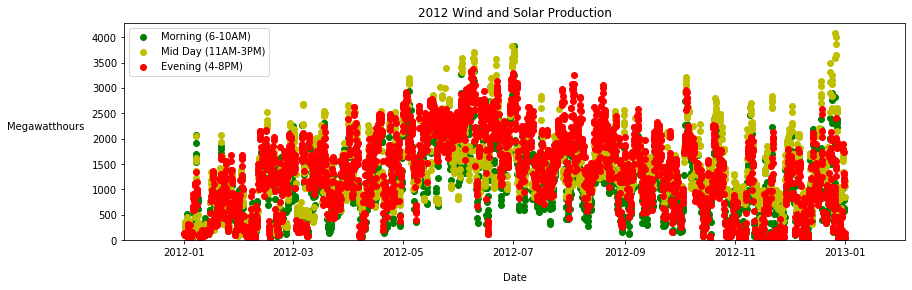

<Figure size 1008x288 with 0 Axes>

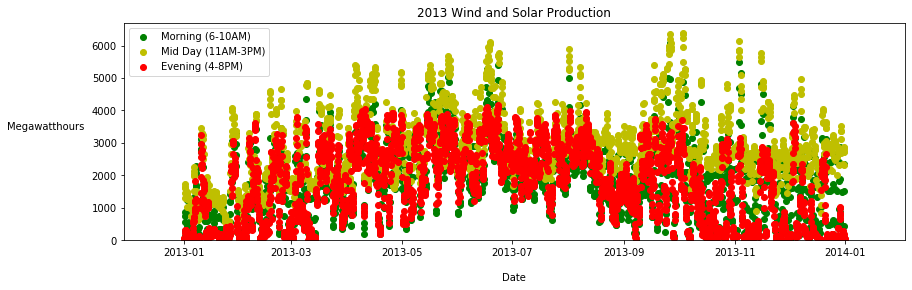

<Figure size 1008x288 with 0 Axes>

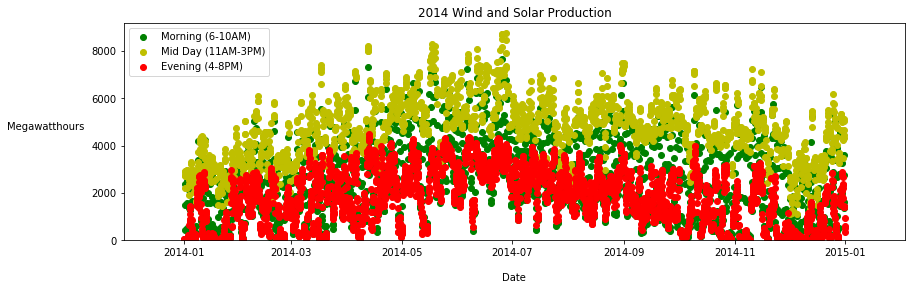

<Figure size 1008x288 with 0 Axes>

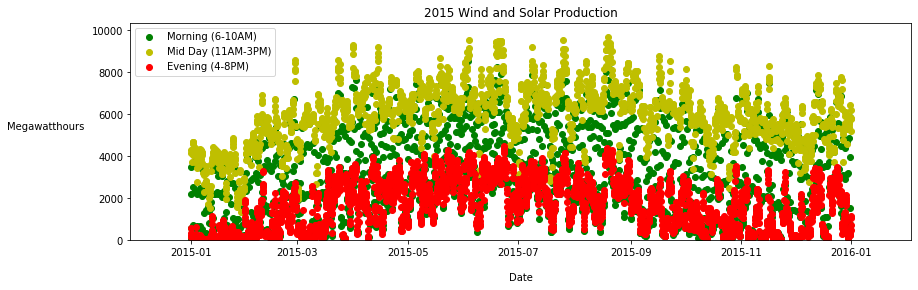

<Figure size 1008x288 with 0 Axes>

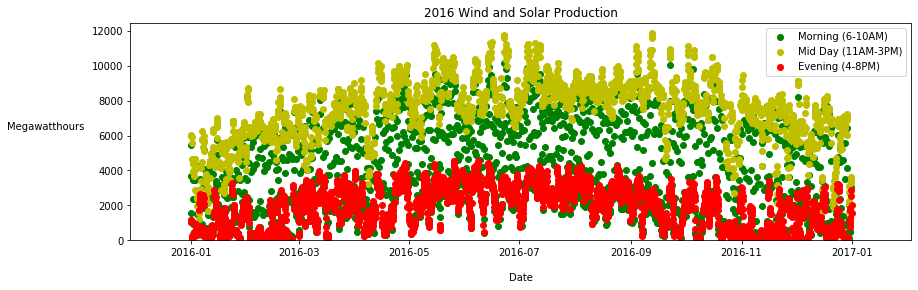

<Figure size 1008x288 with 0 Axes>

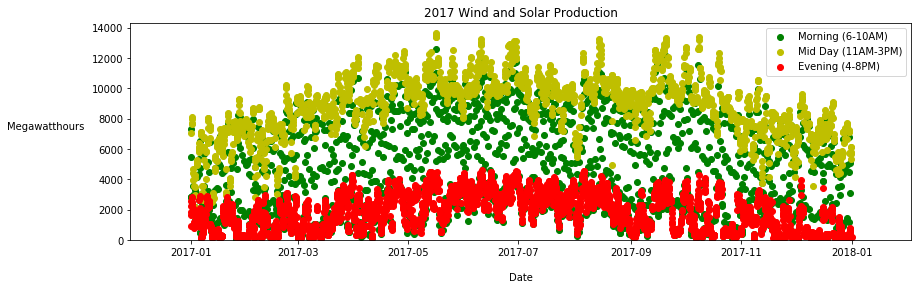

In [281]:
for year in range(2012,2018):
    data = full_data.loc[full_data['YEAR']==year,:]
    hour = data.loc[:,'Hour'].values
    mask_night = ((hour < 6)|(hour >20))
    mask_evening = ((hour < 6)|(hour >20))
    mask_morning = ((hour >5)&(hour<11))
    mask_mid = ((hour >10)&(hour<16))
    masks = [mask_morning, mask_mid, mask_evening]
    plt.figure(figsize=(14,4))
    x = data['TIMESTAMP']
    y = data['WIND SOLAR']
    plt.figure(figsize=(14,4))
    plt.scatter(x[mask_morning], y[mask_morning],c='g',label='Morning (6-10AM)')
    plt.scatter(x[mask_mid], y[mask_mid],c='y',label='Mid Day (11AM-3PM)')
    plt.scatter(x[mask_evening], y[mask_evening],c='r',label='Evening (4-8PM)')
    #plt.xlim(pd.to_datetime('01/01/12'),pd.to_datetime('12/31/12'))
    plt.ylim(0,y.max()*1.05)
    plt.ylabel('Megawatthours ',rotation='0',ha='right')
    plt.xlabel('\nDate')
    plt.title('{} Wind and Solar Production'.format(year))
    plt.legend()
    plt.show()

<Figure size 1008x288 with 0 Axes>

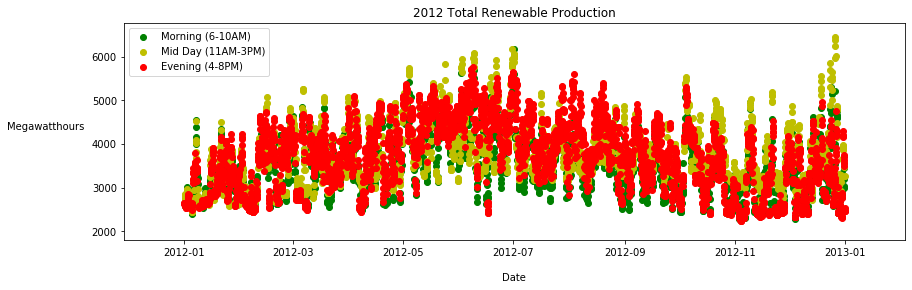

<Figure size 1008x288 with 0 Axes>

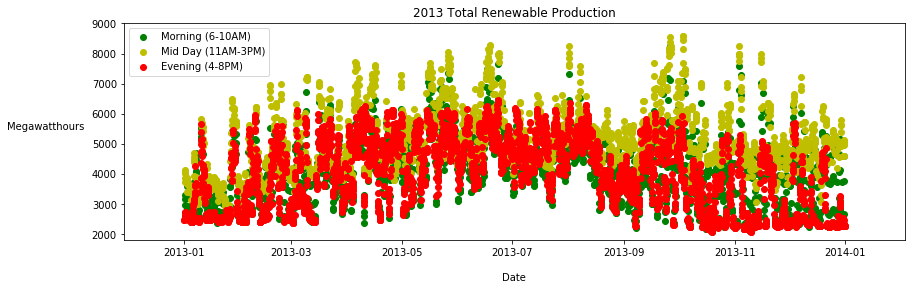

<Figure size 1008x288 with 0 Axes>

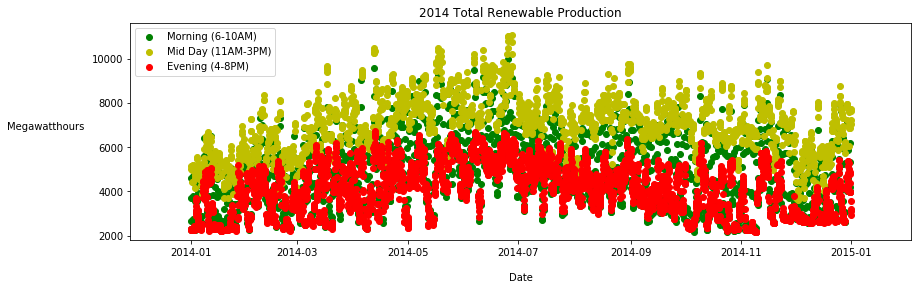

<Figure size 1008x288 with 0 Axes>

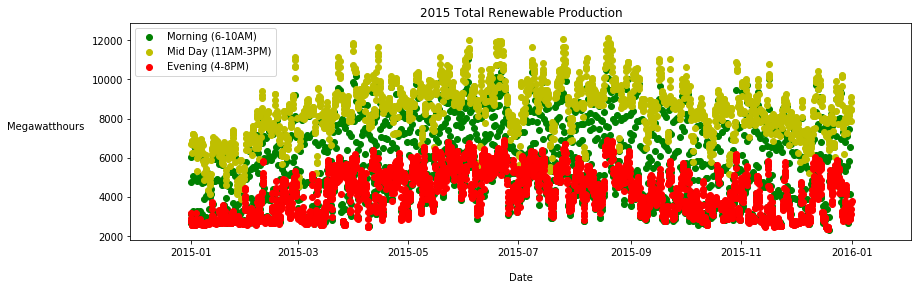

<Figure size 1008x288 with 0 Axes>

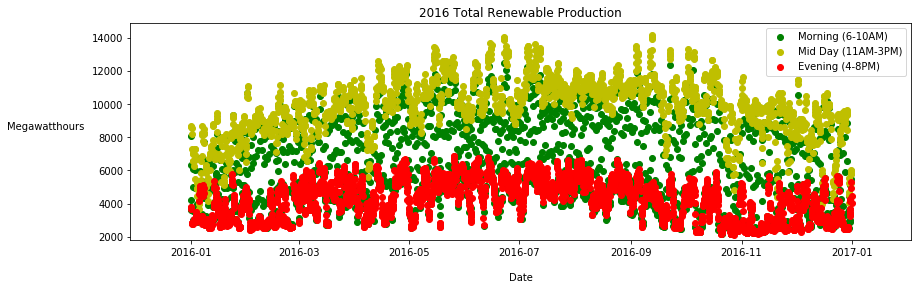

<Figure size 1008x288 with 0 Axes>

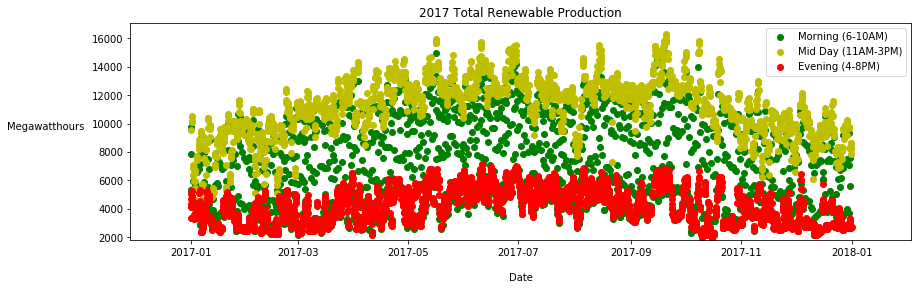

In [280]:
for year in range(2012,2018):
    data = full_data.loc[full_data['YEAR']==year,:]
    hour = data.loc[:,'Hour'].values
    mask_night = ((hour < 6)|(hour >20))
    mask_evening = ((hour < 6)|(hour >20))
    mask_morning = ((hour >5)&(hour<11))
    mask_mid = ((hour >10)&(hour<16))
    masks = [mask_morning, mask_mid, mask_evening]
    plt.figure(figsize=(14,4))
    x = data['TIMESTAMP']
    y = data['RENEW TOTAL']
    plt.figure(figsize=(14,4))
    plt.scatter(x[mask_morning], y[mask_morning],c='g',label='Morning (6-10AM)')
    plt.scatter(x[mask_mid], y[mask_mid],c='y',label='Mid Day (11AM-3PM)')
    plt.scatter(x[mask_evening], y[mask_evening],c='r',label='Evening (4-8PM)')
    #plt.xlim(pd.to_datetime('01/01/12'),pd.to_datetime('12/31/12'))
    plt.ylim(1800,y.max()*1.05)
    plt.ylabel('Megawatthours ',rotation='0',ha='right')
    plt.xlabel('\nDate')
    plt.title('{} Total Renewable Production'.format(year))
    plt.legend()
    plt.show()

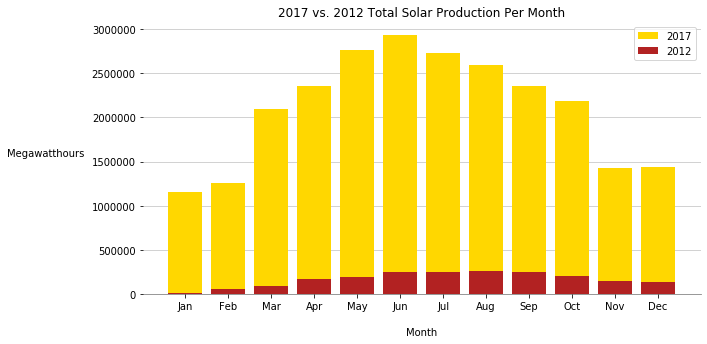

In [276]:
color = ['#FFD700','#B22222']
alpha = [1,1]
years = [2017,2012]


fig, ax = plt.subplots()

for i in range(len(years)):
    data = full_data.loc[full_data['YEAR']==years[i],:]
    grouped = data.groupby('MONTH')
    group_df = pd.DataFrame(grouped['SOLAR TOTAL'].sum()).reset_index()
    group_df['MONTH'] = group_df['MONTH'].map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
    plt.bar(group_df['MONTH'],group_df['SOLAR TOTAL'],color=color[i],alpha=alpha[i],label=years[i])
fig.set_figheight(5)
fig.set_figwidth(10)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_alpha(0.5)
ax.set_axisbelow(True)
plt.grid(axis='y',alpha=.7)
plt.ylabel('Megawatthours ',rotation='0',ha='right')
plt.xlabel('\nMonth')
plt.title('2017 vs. 2012 Total Solar Production Per Month')

plt.legend()
plt.show()

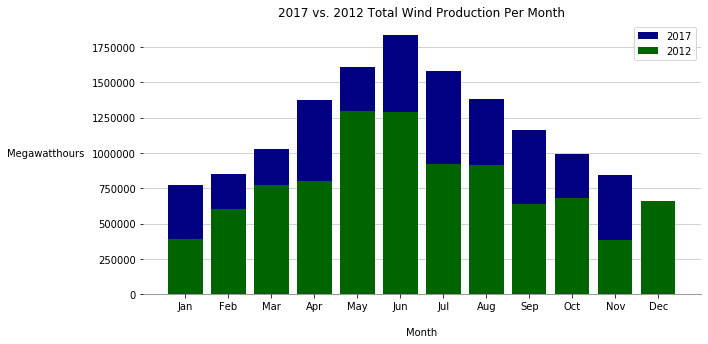

In [279]:
color = ['#000080','#006400']
alpha = [1,1]
years = [2017,2012]


fig, ax = plt.subplots()

for i in range(len(years)):
    data = full_data.loc[full_data['YEAR']==years[i],:]
    grouped = data.groupby('MONTH')
    group_df = pd.DataFrame(grouped['WIND TOTAL'].sum()).reset_index()
    group_df['MONTH'] = group_df['MONTH'].map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
    plt.bar(group_df['MONTH'],group_df['WIND TOTAL'],color=color[i],alpha=alpha[i],label=years[i])
fig.set_figheight(5)
fig.set_figwidth(10)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_alpha(0.5)
ax.set_axisbelow(True)
plt.grid(axis='y',alpha=.7)
plt.ylabel('Megawatthours ',rotation='0',ha='right')
plt.xlabel('\nMonth')
plt.title('2017 vs. 2012 Total Wind Production Per Month')

plt.legend()
plt.show()

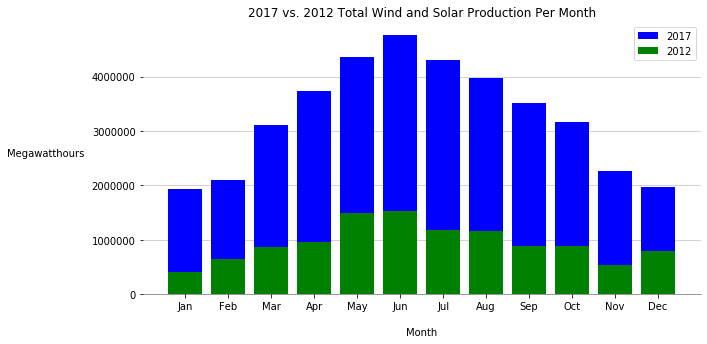

In [165]:
color = ['b','g']
alpha = [1,1]
years = [2017,2012]


fig, ax = plt.subplots()

for i in range(len(years)):
    data = full_data.loc[full_data['YEAR']==years[i],:]
    grouped = data.groupby('MONTH')
    group_df = pd.DataFrame(grouped['WIND SOLAR'].sum()).reset_index()
    group_df['MONTH'] = group_df['MONTH'].map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
    plt.bar(group_df['MONTH'],group_df['WIND SOLAR'],color=color[i],alpha=alpha[i],label=years[i])
fig.set_figheight(5)
fig.set_figwidth(10)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_alpha(0.5)
ax.set_axisbelow(True)
plt.grid(axis='y',alpha=.7)
plt.ylabel('Megawatthours ',rotation='0',ha='right')
plt.xlabel('\nMonth')
plt.title('2017 vs. 2012 Total Wind and Solar Production Per Month')

plt.legend()
plt.show()

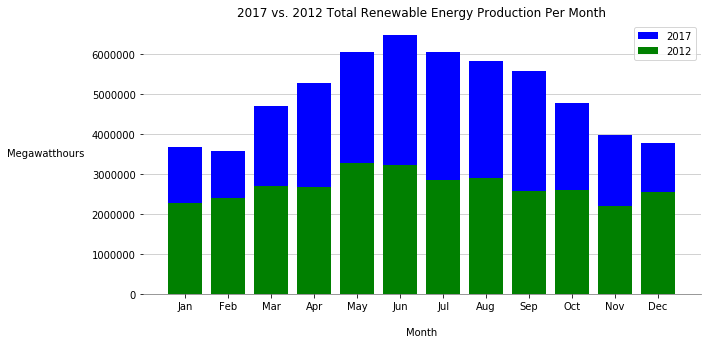

In [200]:
color = ['b','g']
alpha = [1,1]
years = [2017,2012]


fig, ax = plt.subplots()

for i in range(len(years)):
    data = full_data.loc[full_data['YEAR']==years[i],:]
    grouped = data.groupby('MONTH')
    group_df = pd.DataFrame(grouped['RENEW TOTAL'].sum()).reset_index()
    group_df['MONTH'] = group_df['MONTH'].map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
    plt.bar(group_df['MONTH'],group_df['RENEW TOTAL'],color=color[i],alpha=alpha[i],label=years[i])
fig.set_figheight(5)
fig.set_figwidth(10)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_alpha(0.5)
ax.set_axisbelow(True)
plt.grid(axis='y',alpha=.7)
plt.ylabel('Megawatthours ',rotation='0',ha='right')
plt.xlabel('\nMonth')
plt.title('2017 vs. 2012 Total Renewable Energy Production Per Month')

legend = plt.legend()
plt.setp(legend.get_texts(), color='k')
plt.show()

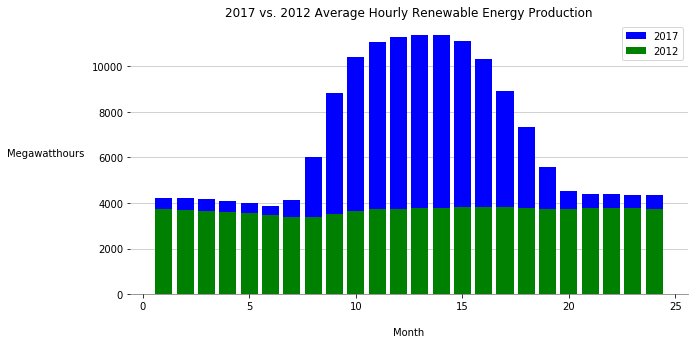

In [167]:
color = ['b','g']
alpha = [1,1]
years = [2017,2012]


fig, ax = plt.subplots()

for i in range(len(years)):
    data = full_data.loc[full_data['YEAR']==years[i],:]
    grouped = data.groupby('Hour')
    group_df = pd.DataFrame(grouped['RENEW TOTAL'].mean()).reset_index()
    plt.bar(group_df['Hour'],group_df['RENEW TOTAL'],color=color[i],alpha=alpha[i],label=years[i])
fig.set_figheight(5)
fig.set_figwidth(10)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_alpha(0.5)
ax.set_axisbelow(True)
plt.grid(axis='y',alpha=.7)
plt.ylabel('Megawatthours ',rotation='0',ha='right')
plt.xlabel('\nTime')
plt.title('2017 vs. 2012 Average Hourly Renewable Energy Production')

plt.legend()
plt.show()

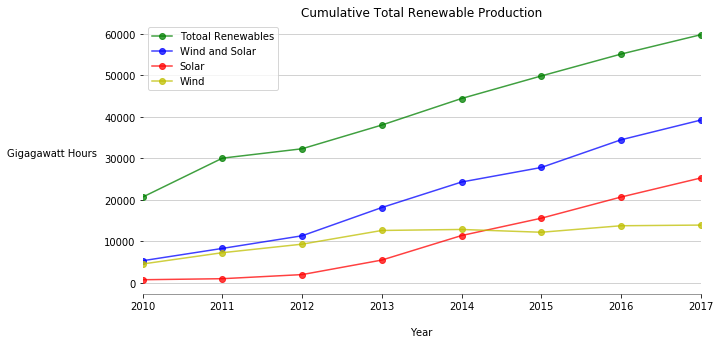

In [267]:
fig, ax = plt.subplots()

grouped = full_data.groupby('YEAR')
grouped_df = pd.DataFrame(grouped['RENEW TOTAL'].sum())
grouped_df['RENEW TOTAL'] = grouped_df['RENEW TOTAL']/1000
grouped_df['WIND SOLAR'] = grouped['WIND SOLAR'].sum()
grouped_df['WIND SOLAR'] = grouped_df['WIND SOLAR']/1000
grouped_df['SOLAR TOTAL'] = grouped['SOLAR TOTAL'].sum()
grouped_df['SOLAR TOTAL'] = grouped_df['SOLAR TOTAL']/1000
grouped_df['WIND TOTAL'] = grouped['WIND TOTAL'].sum()
grouped_df['WIND TOTAL'] = grouped_df['WIND TOTAL']/1000
plt.plot(grouped_df.index,grouped_df['RENEW TOTAL'],color='g',marker='o',alpha=.75,label='Totoal Renewables')
plt.plot(grouped_df.index, grouped_df['WIND SOLAR'], color='b',marker='o',alpha=.75,label='Wind and Solar')
plt.plot(grouped_df.index, grouped_df['SOLAR TOTAL'], color='r',marker='o',alpha=.75,label='Solar')
plt.plot(grouped_df.index, grouped_df['WIND TOTAL'], color='y',marker='o',alpha=.75,label='Wind')
fig.set_figheight(5)
fig.set_figwidth(10)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_alpha(0.5)
ax.set_axisbelow(True)
plt.grid(axis='y',alpha=.7)
plt.ylabel('Gigagawatt Hours ',rotation='0',ha='right')
plt.xlim(2010,2017)
plt.xlabel('\nYear')
plt.title('Cumulative Total Renewable Production')

plt.legend()
plt.show()